# 60mer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 

In [124]:
import pandas as pd
from IPython.display import Image

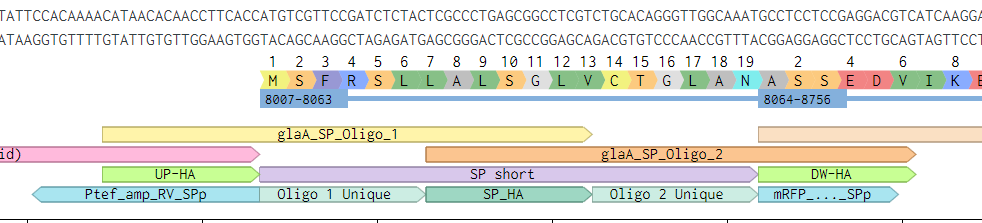

In [125]:
Image(filename='../Data/primer_design.png')

In [126]:
# Homology arms according to positive/top strand (5´ to 3´)
up_homology_arm = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_homology_arm = "GCCTCCTCCGAGGACG" # Annealing in RFP

# Define the complement translation table
complement = str.maketrans("ATCG", "TAGC")

# Reverse complement of up homology arm (bottom negative strand in 5´ to 3´ direction)
UP_HA_rvrs = up_homology_arm.translate(complement)[::-1] 
UP_HA_rvrs

'GGTGAAGGTTGTGTTATGTTTTGTGG'

In [127]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('../Data/07_H2O_AutoML/ML_rnaseq_normalized_signal_peptides.csv')
df_signalP

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090003000935,MEAFNLHNFLSSLYILLPFVILANPVH,27,1.733901e+08
4,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
...,...,...,...,...
1056,AO090103000483,MKTSFLLAAIGFLYRLPCS,19,0.000000e+00
1057,AO090103000487,MTRYLSFLFLLILFGNSVF,19,0.000000e+00
1058,AO090103000493,MRGIVALSFLSVALGVT,17,0.000000e+00
1059,AO090701000994,MRLLLIAPLFSAVSYGAQ,18,0.000000e+00


In [258]:
# Select only rows where "length" column is 23 or smaller
df_signalP_nucleotides_filtered = df_signalP_nucleotides[df_signalP_nucleotides["length"] <= 22]
df_signalP_nucleotides_filtered = df_signalP_nucleotides_filtered.reset_index(drop=True) # reset indexing and drop the old index
df_signalP_nucleotides_filtered

,Accession,sequence,length,normalized abundances,nucleotide sequences,nucleotide length
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08,ATGTTCCGGGTGTCGGCCATGTTCATGGCCTGGTTCTTCTTCGCCA...,57
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08,ATGCCGATCAACTCGTTCGCCTCGCGGTTCGCCTTCTCGTTCCCGA...,66
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08,ATGCAGTTCCCGACCTTCGTGACCTTCGCCTGGATGGCCGTGTCGG...,54
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08,ATGAACGTGGCCACCTTCTCGACCTTCTTCCCGTTCGTGTTCGCCT...,66
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07,ATGCGGTCGACCTTCTGGTCGTTCTTCGGCTTCACCGGCTTCGCCT...,51
...,...,...,...,...,...,...
730,AO090103000483,MKTSFLLAAIGFLYRLPCS,19,0.000000e+00,GTGAACACCACCTTCTTCGTGGCCGCCATGGGCTTCTTCTACCGGT...,60
731,AO090103000487,MTRYLSFLFLLILFGNSVF,19,0.000000e+00,ATGACCCGGTACCTGTCGGTGTTCTTCTACTTCATGCCGTTCGGCA...,60
732,AO090103000493,MRGIVALSFLSVALGVT,17,0.000000e+00,ATGCGGGGCATGGTGGCCTTCTCGTTCTTCTCGGTGGCCTTCGGCG...,54
733,AO090701000994,MRLLLIAPLFSAVSYGAQ,18,0.000000e+00,ATGCGGTTCTTCTTCATGGCCCCGTTCTTCTCGGCCGTGTCGTACG...,57


In [128]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

amino_acid_records = []
for i, row in df_signalP.iterrows():
    sequence = row["sequence"]
    accession = row["Accession"]
    description=f"aa_length={row['length']} normalized_abundances={row['normalized abundances']}"
    record = SeqRecord(seq=Seq(sequence), id=accession, description=description)
    amino_acid_records.append(record)

In [129]:
amino_acid_records

[SeqRecord(seq=Seq('MLRVSAIFMACLLLATAA'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('MPIKSFASRLALSLAICGTAM'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('MHLPTLVTLACMAVSAS'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('MEAFNLHNFLSSLYILLPFVILANPVH'), id='AO090003000935', name='<unknown name>', description='aa_length=27 normalized_abundances=173390067.73336667', dbxrefs=[]),
 SeqRecord(seq=Seq('MKVAIFSTLLPLVLALPAPQT'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundances=110827365.99715652', dbxrefs=[]),
 SeqRecord(seq=Seq('MAVRIARFLGLSTVAYLALANGID'), id='AO090026000003', name='<unknown name>', description='aa_length=24 normalized_abundances=96897960.

In [130]:
from dnachisel.biotools import reverse_translate
#add  * to indicate stop codon and reverse traslate the amino acid sequences
for seq in amino_acid_records: 
    seq.seq = reverse_translate(seq.seq + '*')

In [131]:
seq

SeqRecord(seq='ATGTTATTTTATCGTGCTTTTGGTGGTTTATTATGTTTTTTATATGCTTGTGTTACTGTTTCTTAA', id='AO090701001287', name='<unknown name>', description='aa_length=21 normalized_abundances=0.0', dbxrefs=[])

In [132]:
from teemi.design.retrieve_gene_homologs import codon_optimize_with_dnachisel
from python_codon_tables import download_codons_table

In [133]:
# Get the codon table for A. oryzae from the database
aoryzae_codon_usage_table_w_uracil= download_codons_table(taxid=12388)
aoryzae_codon_usage_table_w_uracil

{'*': {'UAA': 0.0, 'UAG': 0.0, 'UGA': 1.0},
 'A': {'GCA': 0.07, 'GCC': 0.4, 'GCG': 0.33, 'GCU': 0.2},
 'C': {'UGC': 1.0, 'UGU': 0.0},
 'D': {'GAC': 0.87, 'GAU': 0.13},
 'E': {'GAA': 0.14, 'GAG': 0.86},
 'F': {'UUC': 1.0, 'UUU': 0.0},
 'G': {'GGA': 0.11, 'GGC': 0.42, 'GGG': 0.32, 'GGU': 0.16},
 'H': {'CAC': 1.0, 'CAU': 0.0},
 'I': {'AUA': 0.0, 'AUC': 0.93, 'AUU': 0.07},
 'K': {'AAA': 0.0, 'AAG': 1.0},
 'L': {'CUA': 0.0,
  'CUC': 0.42,
  'CUG': 0.54,
  'CUU': 0.04,
  'UUA': 0.0,
  'UUG': 0.0},
 'M': {'AUG': 1.0},
 'N': {'AAC': 0.83, 'AAU': 0.17},
 'P': {'CCA': 0.06, 'CCC': 0.18, 'CCG': 0.65, 'CCU': 0.12},
 'Q': {'CAA': 0.2, 'CAG': 0.8},
 'R': {'AGA': 0.0,
  'AGG': 0.09,
  'CGA': 0.12,
  'CGC': 0.35,
  'CGG': 0.35,
  'CGU': 0.09},
 'S': {'AGC': 0.27,
  'AGU': 0.0,
  'UCA': 0.0,
  'UCC': 0.09,
  'UCG': 0.45,
  'UCU': 0.18},
 'T': {'ACA': 0.08, 'ACC': 0.5, 'ACG': 0.35, 'ACU': 0.08},
 'V': {'GUA': 0.12, 'GUC': 0.32, 'GUG': 0.56, 'GUU': 0.0},
 'W': {'UGG': 1.0},
 'Y': {'UAC': 0.89, 'UAU': 0.1

Lets define a function to change uracil (U) in the codon table with the tyrosine (T)

In [134]:
def modify_codon_table(codon_table):
    """
    Replace 'U' with 'T' in all codons of a given codon usage table.

    Args:
        codon_table (dict): A dictionary containing codon usage frequencies for each amino acid.

    Returns:
        dict: A new dictionary containing the modified codon usage frequencies.
    """
    new_codon_table = {}  # Initialize a new dictionary to store the modified codon usage table
    for amino_acid, codons in codon_table.items():  # Iterate over the amino acids and their codons in the input table
        new_codons = {}  # Initialize a new dictionary to store the modified codons for the current amino acid
        for codon, frequency in codons.items():  # Iterate over the codons and their frequencies for the current amino acid
            new_codon = codon.replace('U', 'T')  # Replace all 'U's with 'T's in the current codon
            new_codons[new_codon] = frequency  # Add the modified codon to the new dictionary with the same frequency
        new_codon_table[amino_acid] = new_codons  # Add the new dictionary of modified codons to the main dictionary for the current amino acid
    return new_codon_table  # Return the new dictionary containing the modified codon usage frequencies

In [135]:
# Modify the codon table to change uracil (U) with tyrosine (T)
aspergillus_codon_usage_table_w_tyrosine = modify_codon_table(aoryzae_codon_usage_table_w_uracil)
aspergillus_codon_usage_table_w_tyrosine

{'*': {'TAA': 0.0, 'TAG': 0.0, 'TGA': 1.0},
 'A': {'GCA': 0.07, 'GCC': 0.4, 'GCG': 0.33, 'GCT': 0.2},
 'C': {'TGC': 1.0, 'TGT': 0.0},
 'D': {'GAC': 0.87, 'GAT': 0.13},
 'E': {'GAA': 0.14, 'GAG': 0.86},
 'F': {'TTC': 1.0, 'TTT': 0.0},
 'G': {'GGA': 0.11, 'GGC': 0.42, 'GGG': 0.32, 'GGT': 0.16},
 'H': {'CAC': 1.0, 'CAT': 0.0},
 'I': {'ATA': 0.0, 'ATC': 0.93, 'ATT': 0.07},
 'K': {'AAA': 0.0, 'AAG': 1.0},
 'L': {'CTA': 0.0,
  'CTC': 0.42,
  'CTG': 0.54,
  'CTT': 0.04,
  'TTA': 0.0,
  'TTG': 0.0},
 'M': {'ATG': 1.0},
 'N': {'AAC': 0.83, 'AAT': 0.17},
 'P': {'CCA': 0.06, 'CCC': 0.18, 'CCG': 0.65, 'CCT': 0.12},
 'Q': {'CAA': 0.2, 'CAG': 0.8},
 'R': {'AGA': 0.0,
  'AGG': 0.09,
  'CGA': 0.12,
  'CGC': 0.35,
  'CGG': 0.35,
  'CGT': 0.09},
 'S': {'AGC': 0.27,
  'AGT': 0.0,
  'TCA': 0.0,
  'TCC': 0.09,
  'TCG': 0.45,
  'TCT': 0.18},
 'T': {'ACA': 0.08, 'ACC': 0.5, 'ACG': 0.35, 'ACT': 0.08},
 'V': {'GTA': 0.12, 'GTC': 0.32, 'GTG': 0.56, 'GTT': 0.0},
 'W': {'TGG': 1.0},
 'Y': {'TAC': 0.89, 'TAT': 0.1

In [136]:
nucleotide_list_codon_optimized = codon_optimize_with_dnachisel(amino_acid_records, codon_usage_table=aspergillus_codon_usage_table_w_tyrosine)

===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-138](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-138]((custom table)) 
           │ Codon opt. on window 0-138 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-150](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-150]((custom table)) 
           │ Codon opt. on window 0-150 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-108](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-108]((custom table)) 
           │ Codon opt. on window 0-108 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-111](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-111]((custom table)) 
           │ Codon opt. on window 0-111 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-117](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-117]((custom table)) 
           │ Codon opt. on window 0-117 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-42](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-42]((custom table)) 
           │ Codon opt. on window 0-42 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -3.17
     -3.17 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -3.17E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-108](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-108]((custom table)) 
           │ Codon opt. on window 0-108 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-207](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-207]((custom table)) 
           │ Codon opt. on window 0-207 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-126](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-126]((custom table)) 
           │ Codon opt. on window 0-126 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -3.17
     -3.17 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -3.17E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-105](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-105]((custom table)) 
           │ Codon opt. on window 0-105 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-168](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-168]((custom table)) 
           │ Codon opt. on window 0-168 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-162](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-162]((custom table)) 
           │ Codon opt. on window 0-162 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-144](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-144]((custom table)) 
           │ Codon opt. on window 0-144 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-117](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-117]((custom table)) 
           │ Codon opt. on window 0-117 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-159](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-159]((custom table)) 
           │ Codon opt. on window 0-159 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-117](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-117]((custom table)) 
           │ Codon opt. on window 0-117 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-42](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-42]((custom table)) 
           │ Codon opt. on window 0-42 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-123](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-123]((custom table)) 
           │ Codon opt. on window 0-123 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-42](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-42]((custom table)) 
           │ Codon opt. on window 0-42 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-114](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-114]((custom table)) 
           │ Codon opt. on window 0-114 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-42](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-42]((custom table)) 
           │ Codon opt. on window 0-42 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-141](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-141]((custom table)) 
           │ Codon opt. on window 0-141 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-111](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-111]((custom table)) 
           │ Codon opt. on window 0-111 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-141](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-141]((custom table)) 
           │ Codon opt. on window 0-141 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-126](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-126]((custom table)) 
           │ Codon opt. on window 0-126 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-186](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-186]((custom table)) 
           │ Codon opt. on window 0-186 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-186](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-186]((custom table)) 
           │ Codon opt. on window 0-186 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-42](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-42]((custom table)) 
           │ Codon opt. on window 0-42 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-162](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-162]((custom table)) 
           │ Codon opt. on window 0-162 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-195](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-195]((custom table)) 
           │ Codon opt. on window 0-195 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-39](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-39]((custom table)) 
           │ Codon opt. on window 0-39 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-180](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-180]((custom table)) 
           │ Codon opt. on window 0-180 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-108](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-108]((custom table)) 
           │ Codon opt. on window 0-108 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-135](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-135]((custom table)) 
           │ Codon opt. on window 0-135 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-108](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-108]((custom table)) 
           │ Codon opt. on window 0-108 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-171](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-171]((custom table)) 
           │ Codon opt. on window 0-171 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-96](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-96]((custom table)) 
           │ Codon opt. on window 0-96 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-99](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-99]((custom table)) 
           │ Codon opt. on window 0-99 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-78](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-78]((custom table)) 
           │ Codon opt. on window 0-78 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-93](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-93]((custom table)) 
           │ Codon opt. on window 0-93 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -3.17
     -3.17 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -3.17E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-102](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-102]((custom table)) 
           │ Codon opt. on window 0-102 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-90](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-90]((custom table)) 
           │ Codon opt. on window 0-90 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:     -1.59
     -1.59 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -1.59E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-51](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-51]((custom table)) 
           │ Codon opt. on window 0-51 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-84](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-84]((custom table)) 
           │ Codon opt. on window 0-84 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-81](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-81]((custom table)) 
           │ Codon opt. on window 0-81 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-111](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-111]((custom table)) 
           │ Codon opt. on window 0-111 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-48](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-48]((custom table)) 
           │ Codon opt. on window 0-48 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-87](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-87]((custom table)) 
           │ Codon opt. on window 0-87 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-63](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-63]((custom table)) 
           │ Codon opt. on window 0-63 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-45](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-45]((custom table)) 
           │ Codon opt. on window 0-45 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-129](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-129]((custom table)) 
           │ Codon opt. on window 0-129 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-69](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-69]((custom table)) 
           │ Codon opt. on window 0-69 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-72](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-72]((custom table)) 
           │ Codon opt. on window 0-72 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-75](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-75]((custom table)) 
           │ Codon opt. on window 0-75 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-60](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-60]((custom table)) 
           │ Codon opt. on window 0-60 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-54](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-54]((custom table)) 
           │ Codon opt. on window 0-54 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-57](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-57]((custom table)) 
           │ Codon opt. on window 0-57 scored -0.00E+00




===> SUCCESS - all constraints evaluations pass
✔PASS ┍ EnforceGCContent[0-66](mini:0.30, maxi:0.70, window:50)
      │ Passed !


===> TOTAL OBJECTIVES SCORE:         0
✔        0 ┍ MaximizeCAI[0-66]((custom table)) 
           │ Codon opt. on window 0-66 scored -0.00E+00




In [161]:
# Visualize the list of SeqRecord objects
nucleotide_list_codon_optimized[:10]

[SeqRecord(seq=Seq('ATGTTCCGGGTGTCGGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTAC'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCCGATCAACTCGTTCGCCTCGCGGTTCGCCTTCTCGTTCCCGATGTGGGGC...TAC'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCAGTTCCCGACCTTCGTGACCTTCGCCTGGATGGCCGTGTCGGCCTCGTAC'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('TCGGACGCCATCGAGCACTGGGAGTTCTTCCCGTCGTTCTGGATGCTGTTCCCG...AAC'), id='AO090003000935', name='<unknown name>', description='aa_length=27 normalized_abundances=173390067.73336667', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAACGTGGCCACCTTCTCGACCTTCTTCCCGTTCGTGTTCGCCTTCGCCGCC...TAC'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundan

In [162]:
# Isolate the SeqRecord objects that have amino acid length of 22 or less
nucleotide_sequences_22aa_filtered = []
for record in nucleotide_list_codon_optimized:
    aa_length = int(record.description.split('=')[1].split()[0])
    if aa_length <= 22:
        nucleotide_sequences_22aa_filtered.append(record)

nucleotide_sequences_22aa_filtered

[SeqRecord(seq=Seq('ATGTTCCGGGTGTCGGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTAC'), id='AO090103000076', name='<unknown name>', description='aa_length=18 normalized_abundances=925619983.9904914', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCCGATCAACTCGTTCGCCTCGCGGTTCGCCTTCTCGTTCCCGATGTGGGGC...TAC'), id='AO090113000063', name='<unknown name>', description='aa_length=21 normalized_abundances=386649196.0842069', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCAGTTCCCGACCTTCGTGACCTTCGCCTGGATGGCCGTGTCGGCCTCGTAC'), id='AO090701000295', name='<unknown name>', description='aa_length=17 normalized_abundances=247866661.2462808', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGAACGTGGCCACCTTCTCGACCTTCTTCCCGTTCGTGTTCGCCTTCGCCGCC...TAC'), id='AO090020000710', name='<unknown name>', description='aa_length=21 normalized_abundances=110827365.99715652', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCGGTCGACCTTCTGGTCGTTCTTCGGCTTCACCGGCTTCGCCTACTAC'), id='AO090020000162', name='<unknown name>', description='aa_length=16 normalized_abundances=40204

In [243]:
# Isoalte the SeqRecord objects with top 20 abundance from filtered nucleotide sequence list
nucleotide_sequences_22a_top20 = [str(record.seq) for record in nucleotide_sequences_22aa_filtered[:25]]
nucleotide_sequences_22a_top20

['ATGTTCCGGGTGTCGGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTAC',
 'ATGCCGATCAACTCGTTCGCCTCGCGGTTCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGTAC',
 'ATGCAGTTCCCGACCTTCGTGACCTTCGCCTGGATGGCCGTGTCGGCCTCGTAC',
 'ATGAACGTGGCCACCTTCTCGACCTTCTTCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCTAC',
 'ATGCGGTCGACCTTCTGGTCGTTCTTCGGCTTCACCGGCTTCGCCTACTAC',
 'ATGCACTTCAACAAGTTCGCCTTCGCCGCCTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGAGTAC',
 'ATGTTCTTCACCCACTCGTTCTTCTTCGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTAC',
 'ATGCACTTCTACAACGTGTTCGGCGTGTTCGCCGCCTTCCACCCGGCCTTCTAC',
 'GCCATGTTCAACTCGGCCTTCACCGCCGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTAC',
 'ATGCGGTCGTTCTTCTGGGCCTCGTTCTTCTCGGGCGTGTTCTAC',
 'ATGAACATGTCGGCCGCCATGTCGACCGCCTTCTTCGCCGTGTCGGCCGCCTAC',
 'ATGGCCCAGTTCATGTTCTCGTTCTCGTTCCGCTCGGCCGTGACCTTCTAC',
 'ATGTTCTCGGTGGCCACCTCGATGTTCGGCTTCTTCGCCACCGTGCCGTTCGCCGCCTAC',
 'ATGTCGTTCCCGTCGTTCTTCAACTGGTCGGCCATGGCCGCCTTCATGGCCCACTTCTGGACCTAC',
 'ATGGTGGCCTTCCACGCCTTCTCGTTCGGCTTCTTCGCCTCGCACGCCTTCTAC',
 'ATGAACCTGTCGCGCTTCTCGTCGTTCGGCTTCTTCGTGCACGCCTCGTC

In [244]:
# Homology arms according to positive/top strand (5´ to 3´)
up_homology_arm = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_homology_arm = "GCCTCCTCCGAGGACG" # Annealing in RFP

# Reverse complement of up homology arm (bottom negative strand in 5´ to 3´ direction)
UP_HA_rvrs = up_homology_arm.translate(complement)[::-1] 
# up_homology_amr = "GGTGAAGGTTGTGTTATGTTTTGTGG" (negative strand - 5´ to 3´)


In [245]:
# Create a new list to store the modified sequences
modified_sequences = []

# Loop through the DNA sequences and add the homology arms to the beginning and end
for seq in nucleotide_sequences_22a_top20:
    #modified_seq = up_homology_arm + seq.lower() + down_homology_arm
    modified_seq = up_homology_arm + seq + down_homology_arm
    modified_sequences.append(modified_seq)

modified_sequences

['CCACAAAACATAACACAACCTTCACCATGTTCCGGGTGTCGGCCATGTTCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCCGATCAACTCGTTCGCCTCGCGGTTCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCAGTTCCCGACCTTCGTGACCTTCGCCTGGATGGCCGTGTCGGCCTCGTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGAACGTGGCCACCTTCTCGACCTTCTTCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCGGTCGACCTTCTGGTCGTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACTTCAACAAGTTCGCCTTCGCCGCCTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGAGTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGTTCTTCACCCACTCGTTCTTCTTCGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACTTCTACAACGTGTTCGGCGTGTTCGCCGCCTTCCACCCGGCCTTCTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCGCCATGTTCAACTCGGCCTTCACCGCCGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTACGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCGG

In [246]:
# Create an empty list to store the UP SPs and DW SPs
up_sps = []
dw_sps = []

# Loop through the DNA sequences and divide them into equal halves
for seq in modified_sequences:
    mid = len(seq) // 2  # Find the midpoint of the sequence
    up_sps.append(seq[:mid])  # Add the first half to the UP SPs list
    dw_sps.append(seq[mid:])  # Add the second half to the DW SPs list

# Measure the length of the sequences in each list
up_sps_len = [len(seq) for seq in up_sps]
dw_sps_len = [len(seq) for seq in dw_sps]

# Create a DataFrame with the UP SPs and DW SPs as columns, along with their respective lengths
df_signalP_divided = pd.DataFrame({"SP1/2 seq (5' to 3')": up_sps, "SP1/2 length": up_sps_len, 
                                    "SP2/2 seq (5' to 3')": dw_sps, "SP2/2 length": dw_sps_len})

df_signalP_divided 

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,CCACAAAACATAACACAACCTTCACCATGTTCCGGGTGTCGGCCATGTT,49,CATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGCCTCCTCCGAG...,50
1,CCACAAAACATAACACAACCTTCACCATGCCGATCAACTCGTTCGC...,54,TCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGTACGCCTCCTC...,54
2,CCACAAAACATAACACAACCTTCACCATGCAGTTCCCGACCTTCGTGA,48,CCTTCGCCTGGATGGCCGTGTCGGCCTCGTACGCCTCCTCCGAGGACG,48
3,CCACAAAACATAACACAACCTTCACCATGAACGTGGCCACCTTCTC...,54,TCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCTACGCCTCCTC...,54
4,CCACAAAACATAACACAACCTTCACCATGCGGTCGACCTTCTGGTC,46,GTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTCCTCCGAGGACG,47
5,CCACAAAACATAACACAACCTTCACCATGCACTTCAACAAGTTCGC...,55,CTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGAGTACGCCTCC...,56
6,CCACAAAACATAACACAACCTTCACCATGTTCTTCACCCACTCGTT...,52,CGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTACGCCTCCTCC...,53
7,CCACAAAACATAACACAACCTTCACCATGCACTTCTACAACGTGTTCG,48,GCGTGTTCGCCGCCTTCCACCCGGCCTTCTACGCCTCCTCCGAGGACG,48
8,CCACAAAACATAACACAACCTTCACCGCCATGTTCAACTCGGCCTT...,52,CGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTACGCCTCCTCC...,53
9,CCACAAAACATAACACAACCTTCACCATGCGGTCGTTCTTCTG,43,GGCCTCGTTCTTCTCGGGCGTGTTCTACGCCTCCTCCGAGGACG,44


In [247]:
# Extract last base pairs from the end and beginnin of the signal peptide sequence halves
SP_seq1_overhang = df_signalP_divided["SP1/2 seq (5' to 3')"].str[-10:] 
SP_seq2_overhang = df_signalP_divided["SP2/2 seq (5' to 3')"].str[:10] 
SP_seq2_overhang

0     CATGGCCTGG
1     TCGCCTTCTC
2     CCTTCGCCTG
3     TCCCGTTCGT
4     GTTCTTCGGC
5     CTCGATGGTG
6     CGCCTTCGCC
7     GCGTGTTCGC
8     CGTGGTGTTC
9     GGCCTCGTTC
10    CGACCGCCTT
11    GTTCTCGTTC
12    TCGGCTTCTT
13    CGGCCATGGC
14    CGTTCGGCTT
15    TCGGCTTCTT
16    CCTTCGTGTC
17    TCGCCTTCTG
18    GCCGATGGTG
19    CTTCGCCGGC
20    CGGCTTCTTC
21    TCCACGCCTT
22    CGCCGCCTTC
23    GGGCATGTTC
24    CCACCTTCGT
Name: SP2/2 seq (5' to 3'), dtype: object

In [248]:
# Make the overlapping arms lowercase for the second half of the signal peptides
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"] +SP_seq2_overhang.str.lower() 
df_signalP_divided["SP2/2 seq (5' to 3')"] = SP_seq1_overhang.str.lower() + df_signalP_divided["SP2/2 seq (5' to 3')"]


# Calculate the new sequence length
SP_seq1_overhang_len = [len(seq) for seq in SP_seq1_overhang]
SP_seq2_overhang_len = [len(seq) for seq in SP_seq2_overhang]
df_signalP_divided["SP1/2 length"] = df_signalP_divided["SP1/2 length"] + SP_seq2_overhang_len
df_signalP_divided["SP2/2 length"] = SP_seq1_overhang_len + df_signalP_divided["SP2/2 length"]
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,CCACAAAACATAACACAACCTTCACCATGTTCCGGGTGTCGGCCAT...,59,cggccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,CCACAAAACATAACACAACCTTCACCATGCCGATCAACTCGTTCGC...,64,gcctcgcggtTCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGT...,64
2,CCACAAAACATAACACAACCTTCACCATGCAGTTCCCGACCTTCGT...,58,accttcgtgaCCTTCGCCTGGATGGCCGTGTCGGCCTCGTACGCCT...,58
3,CCACAAAACATAACACAACCTTCACCATGAACGTGGCCACCTTCTC...,64,tcgaccttctTCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCT...,64
4,CCACAAAACATAACACAACCTTCACCATGCGGTCGACCTTCTGGTC...,56,ccttctggtcGTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,CCACAAAACATAACACAACCTTCACCATGCACTTCAACAAGTTCGC...,65,ccttcgccgcCTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGA...,66
6,CCACAAAACATAACACAACCTTCACCATGTTCTTCACCCACTCGTT...,62,cgttcttcttCGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTA...,63
7,CCACAAAACATAACACAACCTTCACCATGCACTTCTACAACGTGTT...,58,aacgtgttcgGCGTGTTCGCCGCCTTCCACCCGGCCTTCTACGCCT...,58
8,CCACAAAACATAACACAACCTTCACCGCCATGTTCAACTCGGCCTT...,62,ccttcaccgcCGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTA...,63
9,CCACAAAACATAACACAACCTTCACCATGCGGTCGTTCTTCTGggc...,53,cgttcttctgGGCCTCGTTCTTCTCGGGCGTGTTCTACGCCTCCTC...,54


In [249]:
# Define the complement translation table
complement = str.maketrans("ATCG", "TAGC")

# Get the complementary strand of the first half of the signal peptide sequences
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str.translate(complement)
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,GGTGTTTTGTATTGTGTTGGAAGTGGTACAAGGCCCACAGCCGGTA...,59,cggccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,GGTGTTTTGTATTGTGTTGGAAGTGGTACGGCTAGTTGAGCAAGCG...,64,gcctcgcggtTCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGT...,64
2,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTCAAGGGCTGGAAGCA...,58,accttcgtgaCCTTCGCCTGGATGGCCGTGTCGGCCTCGTACGCCT...,58
3,GGTGTTTTGTATTGTGTTGGAAGTGGTACTTGCACCGGTGGAAGAG...,64,tcgaccttctTCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCT...,64
4,GGTGTTTTGTATTGTGTTGGAAGTGGTACGCCAGCTGGAAGACCAG...,56,ccttctggtcGTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGAAGTTGTTCAAGCG...,65,ccttcgccgcCTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGA...,66
6,GGTGTTTTGTATTGTGTTGGAAGTGGTACAAGAAGTGGGTGAGCAA...,62,cgttcttcttCGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTA...,63
7,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGAAGATGTTGCACAA...,58,aacgtgttcgGCGTGTTCGCCGCCTTCCACCCGGCCTTCTACGCCT...,58
8,GGTGTTTTGTATTGTGTTGGAAGTGGCGGTACAAGTTGAGCCGGAA...,62,ccttcaccgcCGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTA...,63
9,GGTGTTTTGTATTGTGTTGGAAGTGGTACGCCAGCAAGAAGACggc...,53,cgttcttctgGGCCTCGTTCTTCTCGGGCGTGTTCTACGCCTCCTC...,54


In [250]:
# Get reverse complement of the complementary sequences to have the 5´ to 3´ arrangement 
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].str[::-1]
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,ggtccggtacAACATGGCCGACACCCGGAACATGGTGAAGGTTGTG...,59,cggccatgttCATGGCCTGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,ctcttccgctACCGCGAGGCGAACGAGTTGATCGGCATGGTGAAGG...,64,gcctcgcggtTCGCCTTCTCGTTCCCGATGTGGGGCACCGCCATGT...,64
2,gtccgcttccTCACGAAGGTCGGGAACTGCATGGTGAAGGTTGTGT...,58,accttcgtgaCCTTCGCCTGGATGGCCGTGTCGGCCTCGTACGCCT...,58
3,tgcttgccctAGAAGGTCGAGAAGGTGGCCACGTTCATGGTGAAGG...,64,tcgaccttctTCCCGTTCGTGTTCGCCTTCGCCGCCCCGCACACCT...,64
4,cggcttcttgGACCAGAAGGTCGACCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtcGTTCTTCGGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,gtggtagctcGCGGCGAAGGCGAACTTGTTGAAGTGCATGGTGAAG...,65,ccttcgccgcCTCGATGGTGGCCACCGAGGAGGAGGAGCAGGAGGA...,66
6,ccgcttccgcAAGAAGAACGAGTGGGTGAAGAACATGGTGAAGGTT...,62,cgttcttcttCGCCTTCGCCTGGTGGCACGCCACCCCGGCCTTCTA...,63
7,cgcttgtgcgCGAACACGTTGTAGAAGTGCATGGTGAAGGTTGTGT...,58,aacgtgttcgGCGTGTTCGCCGCCTTCCACCCGGCCTTCTACGCCT...,58
8,cttgtggtgcGCGGTGAAGGCCGAGTTGAACATGGCGGTGAAGGTT...,62,ccttcaccgcCGTGGTGTTCTGGTTCGCCGTGGACGGCGCCGAGTA...,63
9,cttgctccggCAGAAGAACGACCGCATGGTGAAGGTTGTGTTATGT...,53,cgttcttctgGGCCTCGTTCTTCTCGGGCGTGTTCTACGCCTCCTC...,54


In [251]:
# Make the overlapping arms lowercase for the first half of the signal peptides
df_signalP_divided["SP1/2 seq (5' to 3')"] = df_signalP_divided["SP1/2 seq (5' to 3')"].apply(lambda x: x[:18].lower() + x[18:])
df_signalP_divided["SP2/2 seq (5' to 3')"] = df_signalP_divided["SP2/2 seq (5' to 3')"].apply(lambda x: x[:18].lower() + x[18:])
df_signalP_divided

,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,ggtccggtacaacatggcCGACACCCGGAACATGGTGAAGGTTGTG...,59,cggccatgttcatggcctGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,ctcttccgctaccgcgagGCGAACGAGTTGATCGGCATGGTGAAGG...,64,gcctcgcggttcgccttcTCGTTCCCGATGTGGGGCACCGCCATGT...,64
2,gtccgcttcctcacgaagGTCGGGAACTGCATGGTGAAGGTTGTGT...,58,accttcgtgaccttcgccTGGATGGCCGTGTCGGCCTCGTACGCCT...,58
3,tgcttgccctagaaggtcGAGAAGGTGGCCACGTTCATGGTGAAGG...,64,tcgaccttcttcccgttcGTGTTCGCCTTCGCCGCCCCGCACACCT...,64
4,cggcttcttggaccagaaGGTCGACCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtcgttcttcgGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,gtggtagctcgcggcgaaGGCGAACTTGTTGAAGTGCATGGTGAAG...,65,ccttcgccgcctcgatggTGGCCACCGAGGAGGAGGAGCAGGAGGA...,66
6,ccgcttccgcaagaagaaCGAGTGGGTGAAGAACATGGTGAAGGTT...,62,cgttcttcttcgccttcgCCTGGTGGCACGCCACCCCGGCCTTCTA...,63
7,cgcttgtgcgcgaacacgTTGTAGAAGTGCATGGTGAAGGTTGTGT...,58,aacgtgttcggcgtgttcGCCGCCTTCCACCCGGCCTTCTACGCCT...,58
8,cttgtggtgcgcggtgaaGGCCGAGTTGAACATGGCGGTGAAGGTT...,62,ccttcaccgccgtggtgtTCTGGTTCGCCGTGGACGGCGCCGAGTA...,63
9,cttgctccggcagaagaaCGACCGCATGGTGAAGGTTGTGTTATGT...,53,cgttcttctgggcctcgtTCTTCTCGGGCGTGTTCTACGCCTCCTC...,54


In [261]:
df_signalP_nucleotides_filteredd = df_signalP_nucleotides_filtered[["Accession", "sequence", "length", "normalized abundances"]]
signalP_first25 = df_signalP_nucleotides_filteredd.head(25)
signalP_first25

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07


In [262]:
df_signalP_divided_proteomics = pd.concat([signalP_first25, df_signalP_divided], axis=1)
df_signalP_divided_proteomics

,Accession,sequence,length,normalized abundances,SP1/2 seq (5' to 3'),SP1/2 length,SP2/2 seq (5' to 3'),SP2/2 length
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08,ggtccggtacaacatggcCGACACCCGGAACATGGTGAAGGTTGTG...,59,cggccatgttcatggcctGGTTCTTCTTCGCCACCGCCGCCTACGC...,60
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08,ctcttccgctaccgcgagGCGAACGAGTTGATCGGCATGGTGAAGG...,64,gcctcgcggttcgccttcTCGTTCCCGATGTGGGGCACCGCCATGT...,64
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08,gtccgcttcctcacgaagGTCGGGAACTGCATGGTGAAGGTTGTGT...,58,accttcgtgaccttcgccTGGATGGCCGTGTCGGCCTCGTACGCCT...,58
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08,tgcttgccctagaaggtcGAGAAGGTGGCCACGTTCATGGTGAAGG...,64,tcgaccttcttcccgttcGTGTTCGCCTTCGCCGCCCCGCACACCT...,64
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07,cggcttcttggaccagaaGGTCGACCGCATGGTGAAGGTTGTGTTA...,56,ccttctggtcgttcttcgGCTTCACCGGCTTCGCCTACTACGCCTC...,57
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07,gtggtagctcgcggcgaaGGCGAACTTGTTGAAGTGCATGGTGAAG...,65,ccttcgccgcctcgatggTGGCCACCGAGGAGGAGGAGCAGGAGGA...,66
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07,ccgcttccgcaagaagaaCGAGTGGGTGAAGAACATGGTGAAGGTT...,62,cgttcttcttcgccttcgCCTGGTGGCACGCCACCCCGGCCTTCTA...,63
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07,cgcttgtgcgcgaacacgTTGTAGAAGTGCATGGTGAAGGTTGTGT...,58,aacgtgttcggcgtgttcGCCGCCTTCCACCCGGCCTTCTACGCCT...,58
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07,cttgtggtgcgcggtgaaGGCCGAGTTGAACATGGCGGTGAAGGTT...,62,ccttcaccgccgtggtgtTCTGGTTCGCCGTGGACGGCGCCGAGTA...,63
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07,cttgctccggcagaagaaCGACCGCATGGTGAAGGTTGTGTTATGT...,53,cgttcttctgggcctcgtTCTTCTCGGGCGTGTTCTACGCCTCCTC...,54


In [263]:
# Convert and save a summary dataframe (.csv or .xlsx)
df_signalP_divided_proteomics.to_excel('../Data/primer_design.xlsx', index=False)